In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
exp8_measure_2_df = pd.read_csv('./csv/exp8_measure_02.csv', sep=',')

In [3]:
exp8_2_cut_df = exp8_measure_2_df.dropna()

In [4]:
exp8_2_cut_df

,Timestamp,Relative_Time,PT-M02_1_0_V,PT-M02_1_0_psi,PT-M01_1_1_V,PT-M01_1_1_psi,PT-L01_1_2_V,PT-L01_1_2_psi,Valve_KNOPKA_state,reference_M_Pa
3558,2025-06-18 12:54:00.462,17116.355,2.744500,31.04,0.932625,0.63,1.192750,5.00,1.0,0.565
5415,2025-06-18 12:54:12.601,17128.494,2.985625,35.08,0.996000,1.69,1.424500,8.88,0.0,0.969
6937,2025-06-18 12:54:22.418,17138.311,3.125000,37.42,1.024375,2.17,1.560500,11.17,1.0,1.215
8530,2025-06-18 12:54:32.839,17148.732,3.237125,39.31,1.053625,2.66,1.676875,13.12,0.0,1.420
10009,2025-06-18 12:54:42.471,17158.364,3.361750,41.40,1.090000,3.27,1.788750,15.00,1.0,1.616
11736,2025-06-18 12:54:53.723,17169.616,3.505750,43.81,1.112500,3.65,1.925250,17.29,0.0,1.869
13151,2025-06-18 12:55:02.919,17178.812,3.625625,45.83,1.141625,4.14,2.048875,19.36,1.0,2.073
14997,2025-06-18 12:55:14.941,17190.834,3.813875,48.99,1.189125,4.93,2.237375,22.53,0.0,2.403
16590,2025-06-18 12:55:25.367,17201.260,3.980250,51.78,1.220625,5.46,2.405625,25.35,1.0,2.696
18059,2025-06-18 12:55:34.942,17210.835,4.095875,53.72,1.260250,6.13,2.533375,27.49,0.0,2.938


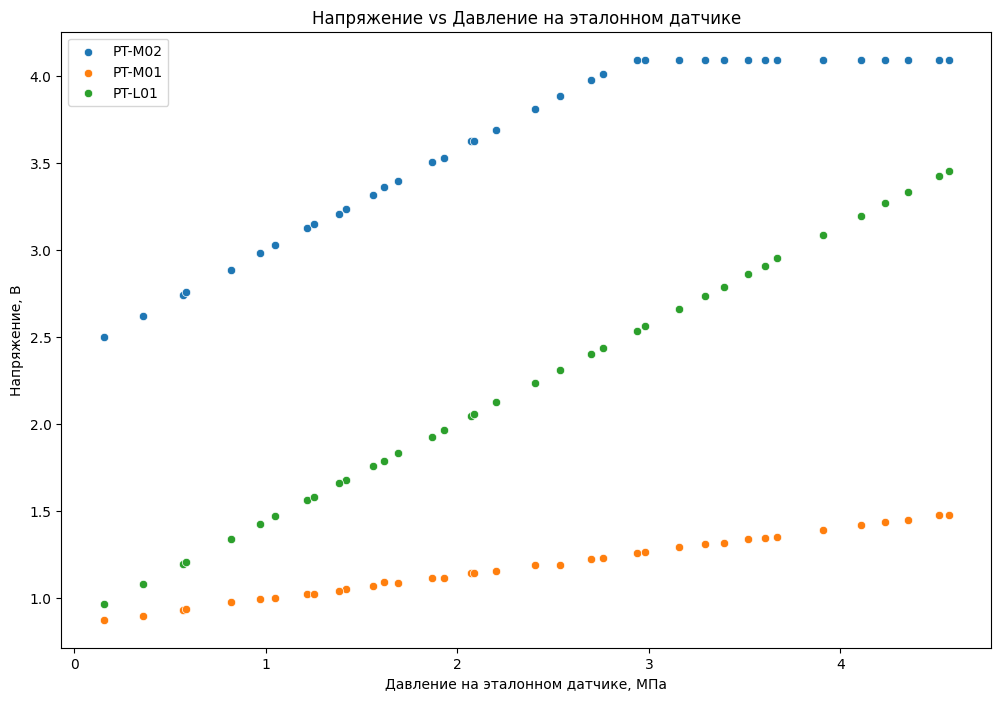

In [5]:
# Построение графиков
plt.figure(figsize=(12, 8))
sns.scatterplot(data=exp8_2_cut_df, x='reference_M_Pa', y='PT-M02_1_0_V', label='PT-M02')
sns.scatterplot(data=exp8_2_cut_df, x='reference_M_Pa', y='PT-M01_1_1_V', label='PT-M01')
sns.scatterplot(data=exp8_2_cut_df, x='reference_M_Pa', y='PT-L01_1_2_V', label='PT-L01')
plt.xlabel('Давление на эталонном датчике, МПа')
plt.ylabel('Напряжение, В')
plt.title('Напряжение vs Давление на эталонном датчике')
plt.legend()
plt.savefig(f'./results/fig/exp_data.png')
plt.show()

In [11]:
def plot_regression_with_error(sensor_voltage, sensor_name):
    # Подготовка данных
    df = exp8_2_cut_df.loc[exp8_2_cut_df[sensor_voltage] < 4]
    x = df[sensor_voltage].values.reshape(-1, 1)
    y = df['reference_M_Pa'].values

    # Создание и обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(x, y)

    # Получение коэффициентов регрессии
    coef = model.coef_[0]
    intercept = model.intercept_

    # Предсказанные значения
    y_pred = model.predict(x)

    # Вычисление коэффициента детерминации R^2 и средней квадратичной ошибки
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    # Вычисление средней относительной ошибки
    relative_errors = np.abs((y - y_pred) / y) * 100
    mean_relative_error = np.mean(relative_errors)

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Данные измерений')
    plt.plot(x, y_pred, color='red', label=f'Линия регрессии: y = {coef:.4f}x + {intercept:.4f}')
    plt.xlabel('Напряжение, В')
    plt.ylabel('Давление на эталонном датчике, МПа')
    plt.title(f'Линия регрессии. {sensor_name}\n$R^2 = {r2:.4f}$, MSE = {mse:.4f}, MRE = {mean_relative_error:.2f}%')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'./results/fig/regression_{sensor_name}.png')
    plt.show()
    print(f'{sensor_name} y = {coef}x + {intercept}')

    # Построение графика остатков
    residuals = y - y_pred
    plt.figure(figsize=(10, 4))
    plt.scatter(x, residuals, color='purple')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Напряжение, В')
    plt.ylabel('Остатки, МПа')
    plt.title(f'График остатков. {sensor_name}')
    plt.grid(True)
    plt.savefig(f'./results/fig/residuals_{sensor_name}.png')
    plt.show()


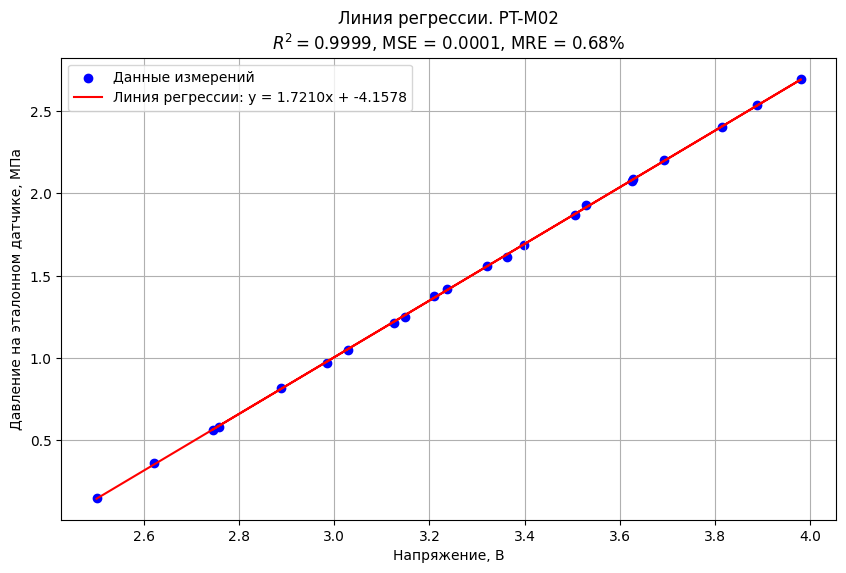

PT-M02 y = 1.720959343351835x + -4.157805087669065


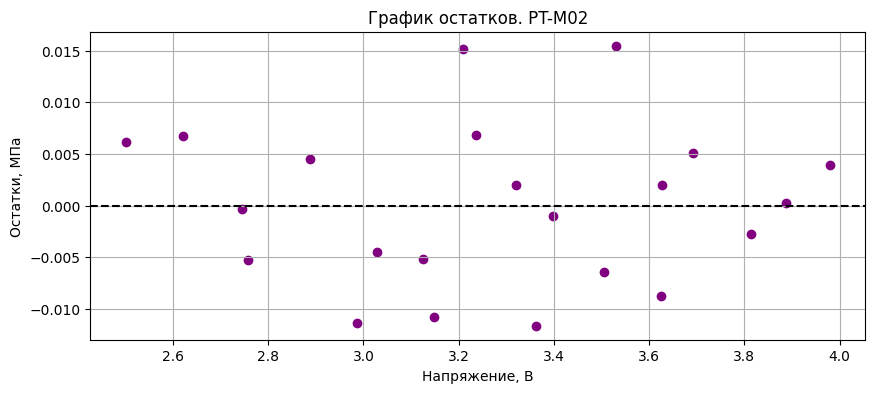

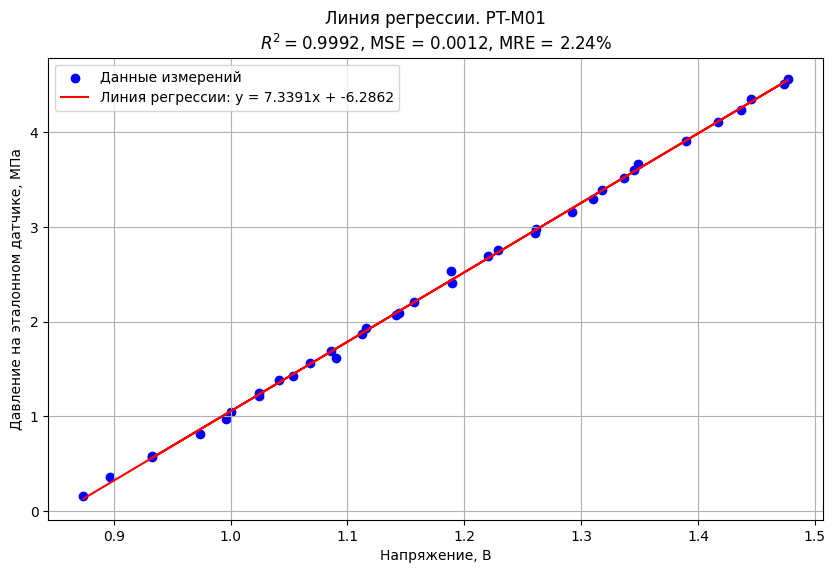

PT-M01 y = 7.339114587001408x + -6.286193467592837


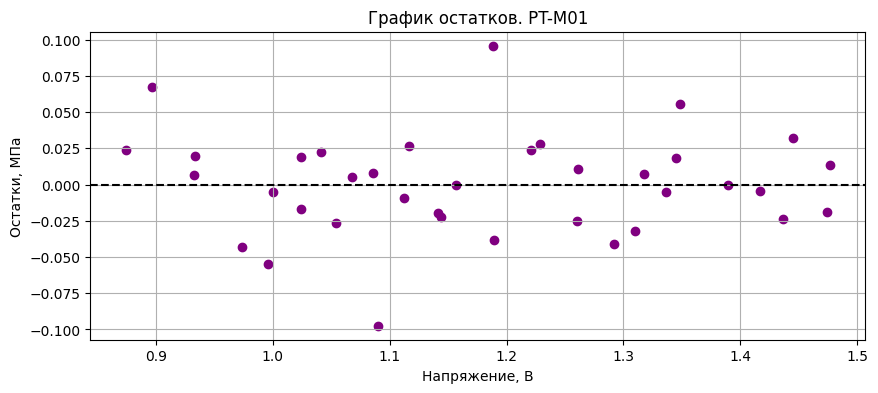

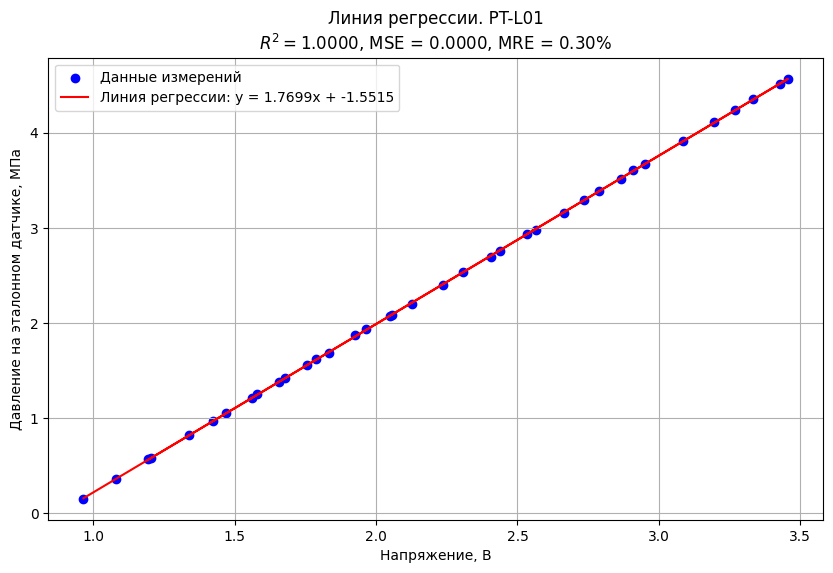

PT-L01 y = 1.7698626007603484x + -1.5514811860415874


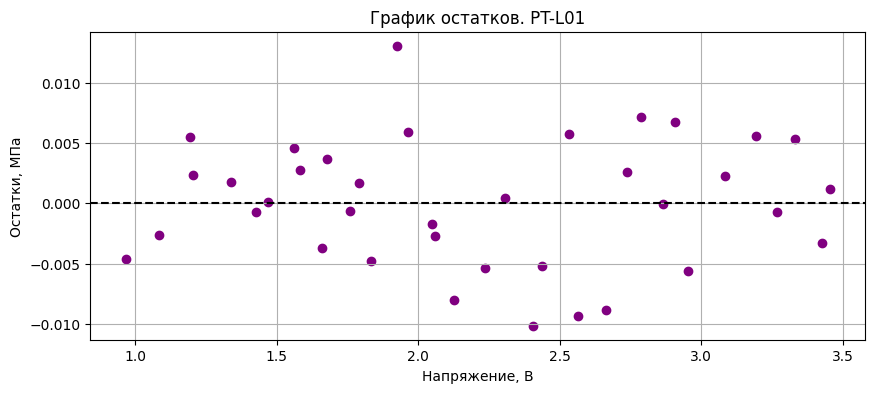

In [12]:
# Построение графиков для каждого датчика
plot_regression_with_error('PT-M02_1_0_V', 'PT-M02')
plot_regression_with_error('PT-M01_1_1_V', 'PT-M01')
plot_regression_with_error('PT-L01_1_2_V', 'PT-L01')